<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NguyenToanQuan 21046403
#Mon An Viet Nam

In [ ]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder='/content/drive/MyDrive/Food'
photos,labels=list(),list()

for file in listdir(folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('Banhchung'):
       output=1
     if file.startswith('Banhmi'):
       output=2
     if file.startswith('Banhtrungthu'):
       output=3
     if file.startswith('Nem'):
       output=4
     if file.startswith('Goi'):
       output=5
     if file.startswith('Comtam'):
       output=6
     if file.startswith('Che'):
       output=7
     if file.startswith('Chaca'):
       output=8
     if file.startswith('Cafe'):
       output=9
     if file.startswith('Banhbao'):
       output=10
     if file.startswith('Bunbo'):
       output=11
     photo=load_img(folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('money_photos.npy',photos)
save('money_labels.npy',labels)

import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
   
classes=11

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

batch_size=64
epochs=60   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1) 

(11, 200, 200, 3) (11,)
X_train: (8, 200, 200, 3)
X_test: (3, 200, 200, 3)
y_train: (8, 11)
y_test: (3, 11)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d

In [ ]:
model.save("/content/drive/MyDrive/Food/Banhbao")

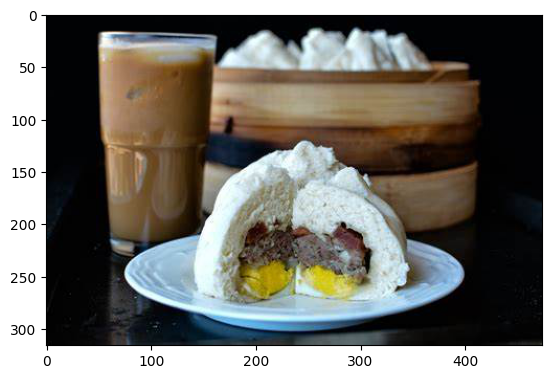

In [ ]:
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model("/content/drive/MyDrive/Food/Banhbao")
img=load_img('/content/drive/MyDrive/Food/Banhbao.jpg')
plt.imshow(img)
plt.show()

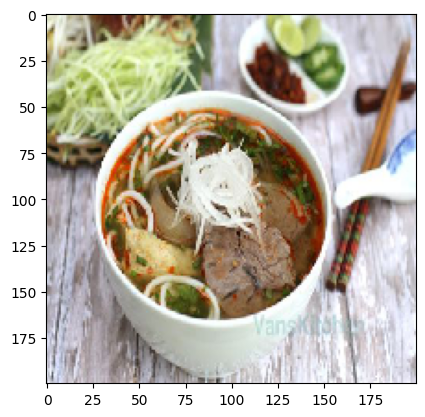

In [ ]:
img=load_img('/content/drive/MyDrive/Food/Bunbo.jpg',target_size=(200,200))
plt.imshow(img)

In [ ]:
class_name = ['Banh_chung','Banh_mi','Banh_trung_thu','Nem','Goi','Com_tam','Che','Cha_ca','Cafe','Banh_bao','Bun_bo']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("Day la ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))


1/1 [==============================] - 0s 275ms/step
Day la  Bun_bo [1.3510753e-20 2.9701783e-32 1.4648905e-34 1.5600390e-28 2.3335019e-15
 9.1111744e-18 1.0579331e-21 1.5744784e-34 6.3300214e-28 5.1559057e-18
 1.0000000e+00]
1.0


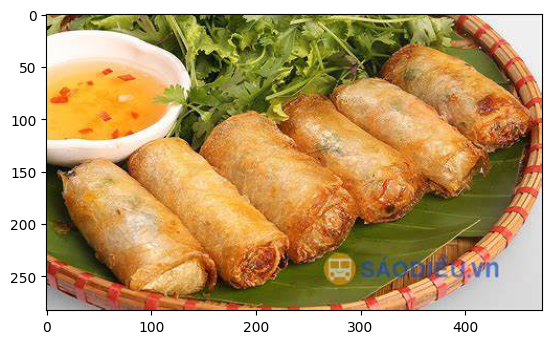

1/1 [==============================] - 0s 126ms/step
Day la   Nem [3.2385418e-07 4.3391808e-22 6.9443859e-13 9.9999964e-01 2.8385126e-17
 2.0058710e-16 1.5049248e-18 2.4599712e-23 1.8587383e-18 4.0842671e-15
 3.1380821e-22]
0.99999964


In [ ]:
img1=load_img('/content/drive/MyDrive/Food/Nem.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/Food/Nem.jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Day la  ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))
     